### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load and Prepare Data

In [2]:
# Load the dataset
glass_df = pd.read_csv('glass.csv')
glass_df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Visualizing the data before splitting to understand its distribution, relationships between features

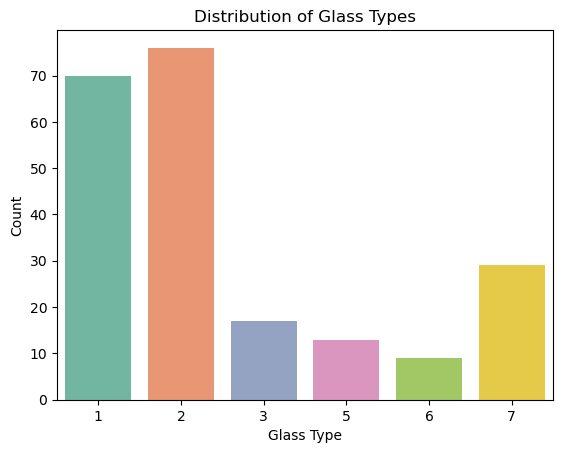

In [4]:
sns.countplot(x='Type', hue='Type', data=glass_df,palette='Set2',legend=False)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

In [5]:
# showing how many instances (or samples) of each glass type are present.
# The plot tells you whether the glass types are balanced or imbalanced. If one bar is significantly taller than the others, 
# it indicates that the dataset has more instances of that type of glass, leading to potential class imbalance.
# The y-axis represents the number of instances (samples) of each glass type in the dataset. 
# The height of each bar corresponds to how many samples of that particular type are present.

####  Separate the features (X) and the target (y)

In [6]:
X = glass_df.drop(columns=['Type'])
y = glass_df['Type']

#### Split Data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
(X_train).shape,( X_test).shape

((149, 9), (65, 9))

In [9]:
X_train.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00


In [10]:
y_train.sample(5)

52     1
37     1
123    2
193    7
112    2
Name: Type, dtype: int64

#### Create the Pipeline
We will create a pipeline that standardizes the features using StandardScaler and trains a RandomForestClassifier.

In [11]:
# Define the pipeline
pipe = Pipeline([
    ('scalar', StandardScaler()),# Step 1: Standardize features
    ('clf', RandomForestClassifier(n_estimators=100, random_state= 42)) # Step 2: Train Random Forest
    ])
pipe

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

### Fit and Evaluate the Pipeline

In [12]:
# Fit the Pipeline to the training data  
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

In [13]:
# Predict on the test data
y_pred = pipe.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [14]:
# Calculate accuracy
accuracy_score(y_test, y_pred)*100

76.92307692307693

##### An accuracy score of 76.92% suggests that the model is correctly predicting the glass type for about 77% of the test data.

## Set Up Hyperparameter Tuning with GridSearchCV
We will use GridSearchCV to search for the best hyperparameters for the RandomForestClassifier.

In [15]:
# Define parameter grid for GridSearchCV (fix the typo)
param_grid = {
    'clf__n_estimators': [100, 200, 300],         # Number of trees in the forest
    'clf__max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'clf__min_samples_split': [2, 5, 10],         # Minimum samples required to split a node (corrected)
    'clf__min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node
    'clf__bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}


### GridSearchCV using Pipeline
Set up GridSearchCV with 5-fold cross-validation

In [16]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [17]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

In [18]:
# Print the best hyperparameters 
print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}


In [24]:
# Predict on the test data using the best estimator
#y_pred = grid_search.predict(X_test)
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 2, 5, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 1, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [26]:
# Calculate and print accuracy
accuracy_score(y_test, y_pred)*100


76.92307692307693

In [27]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.79      0.65      0.71        23
           3       0.67      0.50      0.57         4
           5       0.67      0.67      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.77      0.76        65
weighted avg       0.78      0.77      0.77        65



In [29]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[17,  2,  0,  0,  0,  0],
       [ 4, 15,  1,  2,  1,  0],
       [ 2,  0,  2,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  0,  9]], dtype=int64)

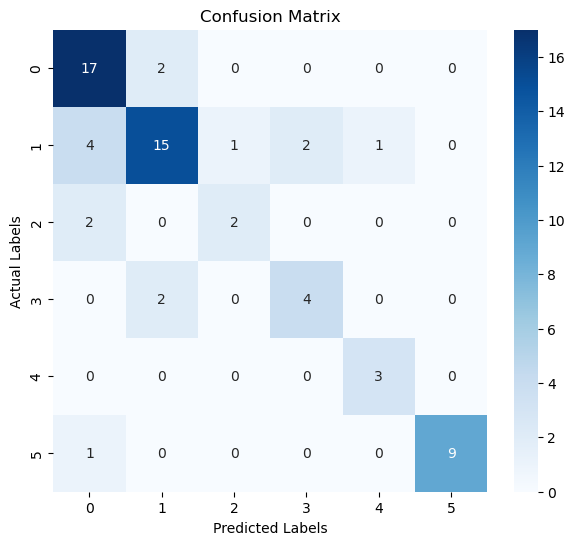

In [32]:
# Plot Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [46]:
best_model= grid_search.best_estimator_
best_model

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [47]:
best_model.named_steps['clf']

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [48]:
random_forest= best_model.named_steps['clf']

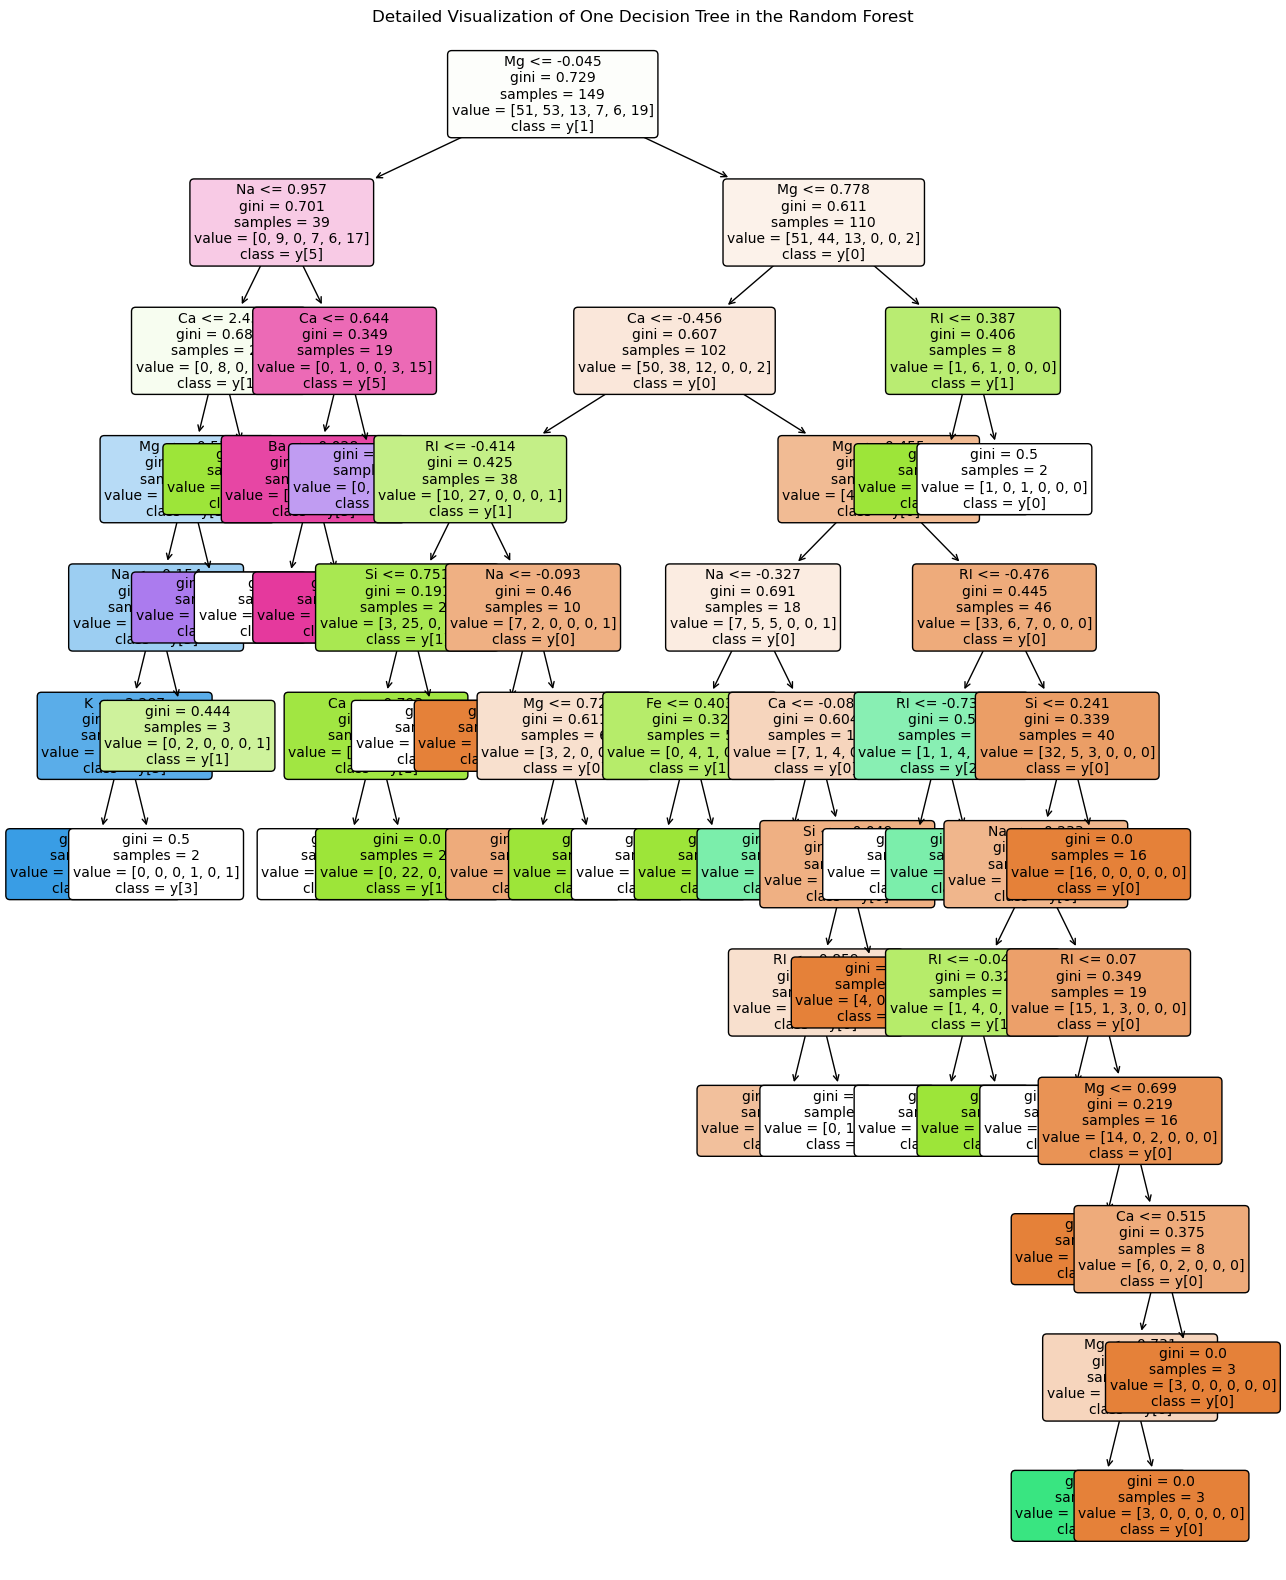

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get one tree from the random forest (e.g., the first one)
single_tree = random_forest.estimators_[0]

# Set up a larger plot for better visualization
plt.figure(figsize=(15, 20))  # Increase the figure size

# Plot the tree with smaller font size for better readability
plot_tree(single_tree, 
          filled=True, 
          feature_names=glass_df.columns[:-1], 
          class_names=True, 
          rounded=True, 
          fontsize=10)  # Reduce font size for better fit

plt.title("Detailed Visualization of One Decision Tree in the Random Forest")
plt.show()


### Conclusion:

##### The model is good at predicting Class 1 and Class 6 but has some difficulty with Class 2 and Class 3.
##### Errors mostly occur between adjacent classes, which might indicate some overlap or similarity between those classes.
##### The accuracy_score obtained is approximately 76.92%. This means that  model correctly predicted the glass type for about 76.92% of the test samples.
##### Accuracy measures how often the model’s predictions match the actual outcomes.
##### 76.92% accuracy indicates that out of all the glass samples in test dataset, the model correctly classified roughly 77 out of every 100 samples.